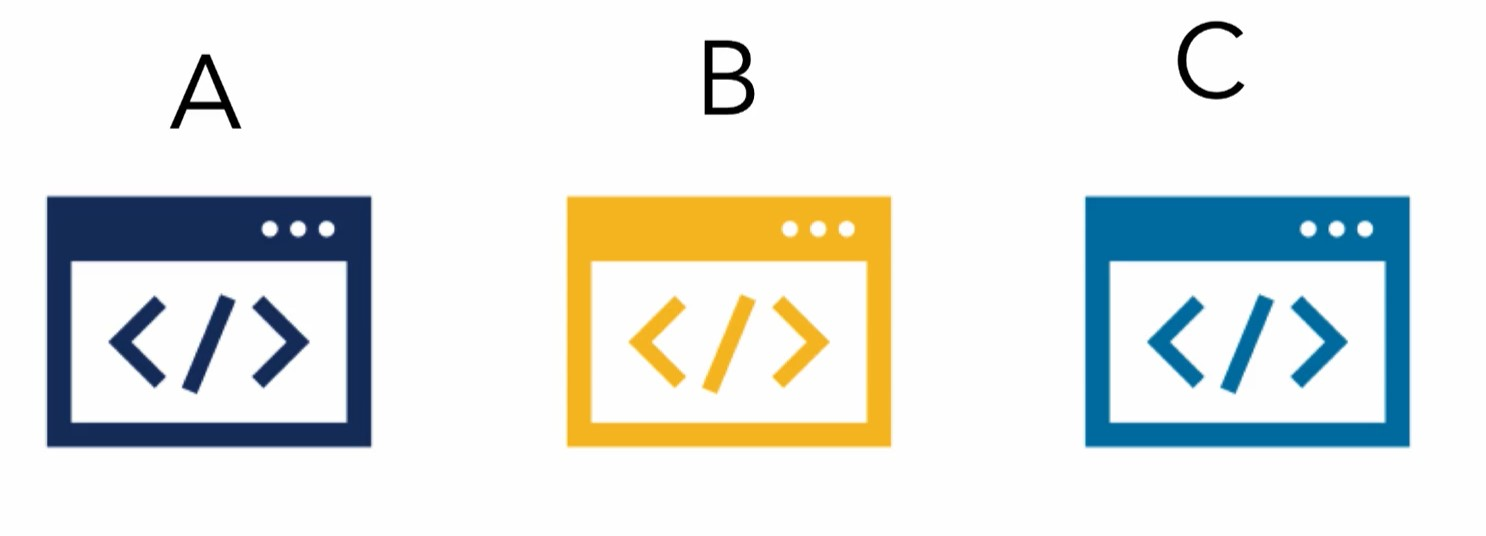

# WHAT IS THE AB TESTING ?

A/B testing, also known as split testing, is a method of comparing two variants(A and B) to determine which one performs better. In A/B testing, two variants (A and B) are created with one element of the design or content being different between the two variants. The two versions are then shown randomly to users, and their behavior is monitored and compared to determine which variant performs better based on a predefined goal, such as the conversion rate, click-through rate, or engagement rate.

A/B testing is commonly used in website optimization, digital marketing, and product development to determine which variant is more effective at achieving a specific goal. It helps businesses make data-driven decisions by providing insight into what resonates better with their audience and what changes can be made to improve the user experience and increase conversions.

# Hypothesis Testing

Hypothesis tests are analytical tools used as a statistical method. These tests aim to test a hypothesis (claim) about a population using sample data. Hypothesis tests help us make inferences about whether a hypothesis is true or not by collecting statistical evidence.

Generally, two hypotheses are formulated: the null hypothesis (H0) and the alternative hypothesis (H1 or HA). The null hypothesis represents the existing condition or the accepted assumptions, while the alternative hypothesis claims a specific change or effect.

Hypothesis tests can be categorized into the following types:

- **One-Sample T Test:** Used to test if the mean of a population is significantly different from a specific value.

- **Independent Two-Sample T Test:** Used to test if there is a significant difference between the means of two independent groups.

- **Paired Two-Sample T Test:** Used to test if there is a significant difference between the means of two related or paired groups.

- **Analysis of Variance (ANOVA):** Used to test if there is a significant difference among the means of three or more groups.

- **Chi-Square Test:** Used to test if there is a dependency or association between two categorical variables.

- **Regression Analysis:** Used to analyze the relationship between dependent and independent variables.

These are just some popular types of hypothesis tests, and there are many more methods available in statistics. Hypothesis tests are used in various fields, ranging from scientific research and marketing strategies to medical studies and industrial quality control processes. These tests enable us to make objective decisions based on data and evaluate statistical significance.

- Hypothesis tests are statistical methods used to test a belief or proposition.

- Within the scope of hypothesis testing, there are group comparisons.

- The main objective in group comparisons is to determine whether observed differences are due to chance or if there is a genuine difference.

**For example:**

- Did the average daily usage time of users increase after a user interface change in a mobile application?

- The result we obtain from this analysis, based on the sample we have, will help us determine if the observed outcome occurred by chance or if there is indeed a significant difference.

- We will strive to understand this through statistical calculations and analysis. We will provide evidence to support our findings.

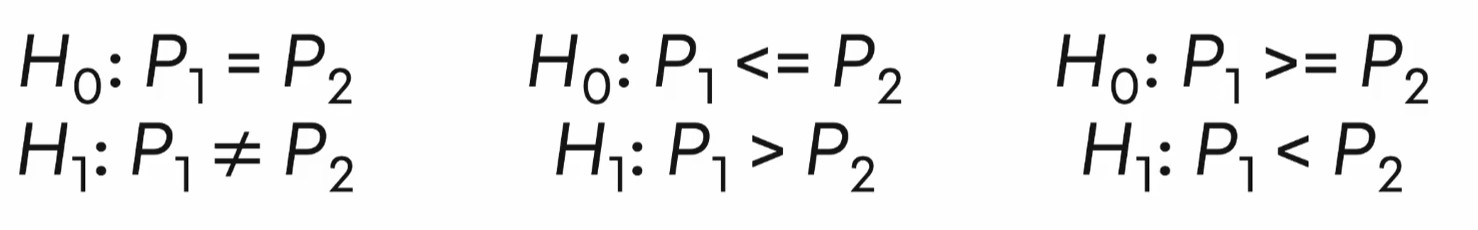

# ANOVA (Analysis of Variance)

- ANOVA (Analysis of Variance) is a statistical method and is used to determine the statistical significance between means between different groups. By analyzing the variance between groups, ANOVA determines whether the groups are statistically different.
- Used to compare the means of more than two groups.
- Here it will only be whether there is a difference between the groups or not.
- So when there are more than two groups, we will be asking the question whether there is a difference between the averages of these groups and we will continue.

# Road Map
1. Set up Hypotheses
2. Assumption Check
    - 2.1. Assumption of Normality
    - 2.2. Variance Homogeneity
3. Implementation of the Hypothesis
    - 3.1. If the assumptions are met, independent two sample t test (parametric test)
    - 3.2.If assumptions are not met, mannwhitneyu test (non-parametric test)
4. Interpret results according to p-value

In [1]:
# import Required Libraries

import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu,pearsonr, spearmanr, kendalltau, f_oneway, kruskal
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.multicomp import MultiComparison

In [2]:
# Adjusting Row Column Settings

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Exercise 7: Is there a significant difference in mean between days?

In [3]:
# Loading the Data Set

df = sns.load_dataset("tips")

In [4]:
# Preliminary examination of the data set

def check_df(dataframe, head=5):
    print('##################### Shape #####################')
    print(dataframe.shape)
    print('##################### Types #####################')
    print(dataframe.dtypes)
    print('##################### Head #####################')
    print(dataframe.head(head))
    print('##################### Tail #####################')
    print(dataframe.tail(head))
    print('##################### NA #####################')
    print(dataframe.isnull().sum())
    print('##################### Quantiles #####################')
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

##################### Shape #####################
(244, 7)
##################### Types #####################
total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object
##################### Head #####################
   total_bill     tip     sex smoker  day    time  size
0    16.99000 1.01000  Female     No  Sun  Dinner     2
1    10.34000 1.66000    Male     No  Sun  Dinner     3
2    21.01000 3.50000    Male     No  Sun  Dinner     3
3    23.68000 3.31000    Male     No  Sun  Dinner     2
4    24.59000 3.61000  Female     No  Sun  Dinner     4
##################### Tail #####################
     total_bill     tip     sex smoker   day    time  size
239    29.03000 5.92000    Male     No   Sat  Dinner     3
240    27.18000 2.00000  Female    Yes   Sat  Dinner     2
241    22.67000 2.00000    Male    Yes   Sat  Dinner     2
242    17.82000 1.75000    Male     No   Sat  

In [5]:
df.groupby("day")["total_bill"].mean()

day
Thur   17.68274
Fri    17.15158
Sat    20.44138
Sun    21.41000
Name: total_bill, dtype: float64

# 1. Establish the hypotheses¶

- **HO: m1 = m2 = m3 = m4** There is no difference between group means.
- **H1:** There is a difference between group averages. They are not equal. At least one of them is different.

# 2. Examine Assumptions

- Assumption of normality
- Assumption of homogeneity of variance

- If the hypothesis is satisfied, one way anova test
- If the assumption is not satisfied, Kruskal test

In [6]:
# H0: The assumption of normal distribution is satisfied.

In [7]:
for group in list(df["day"].unique()):
    pvalue = shapiro(df.loc[df["day"] == group, "total_bill"])[1]
    print(group, 'p-value: %.4f' % pvalue)

Sun p-value: 0.0036
Sat p-value: 0.0000
Thur p-value: 0.0000
Fri p-value: 0.0409


In [8]:
# Since the p-value values are less than 0.05, the H0 hypothesis is rejected.
# Normal distribution assumption is not satisfied.
# Therefore, a non-parametric test is required.

In [9]:
# H0: Assumption of homogeneity of variance is satisfied..

In [10]:
test_stat, pvalue = levene(df.loc[df["day"] == "Sun", "total_bill"],
                           df.loc[df["day"] == "Sat", "total_bill"],
                           df.loc[df["day"] == "Thur", "total_bill"],
                           df.loc[df["day"] == "Fri", "total_bill"])

In [11]:
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.6654, p-value = 0.5741


# 3. Hypothesis testing and evaluation of the p-value

In [12]:
df.groupby("day").agg({"total_bill": ["mean", "median"]})

total_bill         
           mean   median
day                     
Thur   17.68274 16.20000
Fri    17.15158 15.38000
Sat    20.44138 18.24000
Sun    21.41000 19.63000

In [13]:
# HO: There is no statistically significant difference between group averages.

**Parametric Anova Test:**

In [14]:
f_oneway(df.loc[df["day"] == "Thur", "total_bill"],
         df.loc[df["day"] == "Fri", "total_bill"],
         df.loc[df["day"] == "Sat", "total_bill"],
         df.loc[df["day"] == "Sun", "total_bill"])

F_onewayResult(statistic=2.7674794432863363, pvalue=0.04245383328952047)

In [15]:
# Since the p-value values are less than 0.05, the H0 hypothesis is rejected.
# There is a statistically significant difference between group averages.

**Nonparametric Anova Test:**

In [16]:
kruskal(df.loc[df["day"] == "Thur", "total_bill"],
        df.loc[df["day"] == "Fri", "total_bill"],
        df.loc[df["day"] == "Sat", "total_bill"],
        df.loc[df["day"] == "Sun", "total_bill"])

KruskalResult(statistic=10.403076391437086, pvalue=0.01543300820104127)

In [17]:
# Since the p-value values are less than 0.05, the H0 hypothesis is rejected.
# There is a statistically significant difference between group averages.

# Which group is the difference due to?

In [18]:
comparison = MultiComparison(df['total_bill'], df['day'])

In [19]:
tukey = comparison.tukeyhsd(0.05)

In [20]:
print(tukey.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   Fri    Sat   3.2898 0.4541 -2.4799  9.0595  False
   Fri    Sun   4.2584 0.2371 -1.5856 10.1025  False
   Fri   Thur   0.5312 0.9957 -5.4434  6.5057  False
   Sat    Sun   0.9686 0.8968 -2.6088   4.546  False
   Sat   Thur  -2.7586 0.2374 -6.5455  1.0282  False
   Sun   Thur  -3.7273 0.0668 -7.6264  0.1719  False
----------------------------------------------------
